In [1]:
import wandb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
api = wandb.Api()
run = api.run("snnithya/Gesture Analysis/1t70w94u")

In [3]:
run.history().keys()

Index(['_step', 'loss', 'learning_rate', '_runtime', 'lr', 'accuracy', 'epoch',
       'val_accuracy', '_timestamp', 'val_loss'],
      dtype='object')

In [4]:
losses = [val['loss'] for val in run.scan_history()]
accs = [val['accuracy'] for val in run.scan_history()]
val_losses = [val['val_loss'] for val in run.scan_history()]
val_accuracy = [val['val_accuracy'] for val in run.scan_history()]
epochs = [val['epoch'] for val in run.scan_history()]

In [5]:
df = pd.DataFrame({'epoch': epochs, 'loss': losses, 'acc': accs, 'val_loss': val_losses, 'val_acc': val_accuracy})

In [6]:
df

,epoch,loss,acc,val_loss,val_acc
0,0,5.347397,0.142934,5.089788,0.148148
1,1,5.103879,0.169946,5.034003,0.111111
2,2,4.977954,0.185868,4.979260,0.111111
3,3,4.894642,0.190519,4.925436,0.111111
4,4,4.803751,0.208408,4.873003,0.111111
...,...,...,...,...,...
3755,3755,1.053161,0.809302,0.857445,0.900206
3756,3756,1.056027,0.801431,0.857564,0.900206
3757,3757,1.050858,0.807335,0.860513,0.901235
3758,3758,1.066322,0.797853,0.857311,0.900206


In [7]:
min_val_loss = [val_losses[0]]
min_val_loss.extend([min(val_losses[0:i]) for i in range(1, len(losses))])
max_val_acc = [val_accuracy[0]]
max_val_acc.extend([max(val_accuracy[0:i]) for i in range(1, len(losses))])

In [8]:
df['min_val_loss'] = min_val_loss
df['max_val_accuracy'] = max_val_acc

In [9]:
thresh_vals = range(10, 200, 10)
epoch = []

In [10]:
for thresh in thresh_vals:
    for i in range(thresh, len(max_val_acc)):
        if max_val_acc[i] != max(val_accuracy[i-thresh: i]):
            epoch.append(i)
            break
        else:
            continue

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
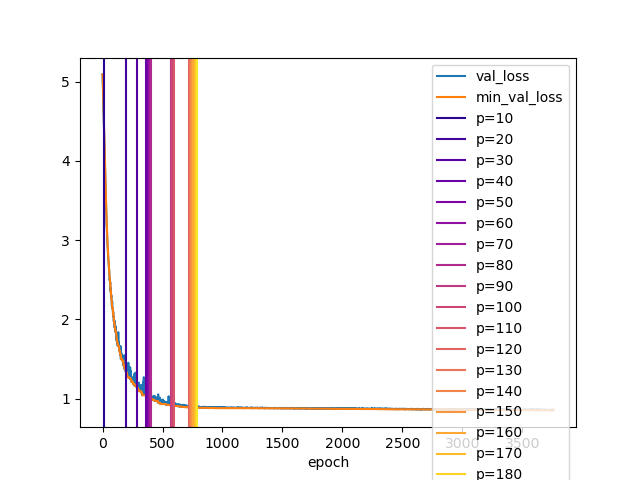

In [11]:
colors = plt.get_cmap('plasma', 200)
df.plot(x='epoch', y=['val_loss', 'min_val_loss'])
for i, e in enumerate(epoch):
    plt.axvline(x=e, label=f'p={thresh_vals[i]}', c=colors(thresh_vals[i]))
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
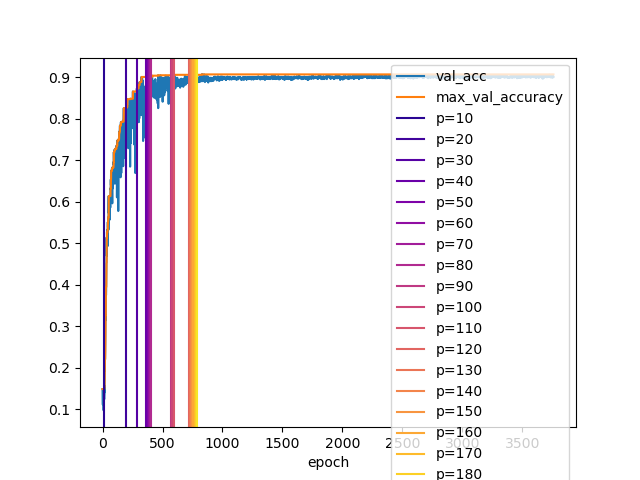

In [12]:
colors = plt.get_cmap('plasma', 200)
df.plot(x='epoch', y=['val_acc', 'max_val_accuracy'])
for i, e in enumerate(epoch):
    plt.axvline(x=e, label=f'p={thresh_vals[i]}', c=colors(thresh_vals[i]))
plt.legend()

In [13]:
min_val_ratio = [val_losses[e]/min_val_loss[-1] for e in epoch]
max_val_acc_ratio = [max_val_acc[e]/max_val_acc[-1] for e in epoch]
val_accs_thresh = [max_val_acc[e] for e in epoch]
val_loss_thresh = [min_val_loss[e] for e in epoch]

In [14]:
df_thresh = pd.DataFrame({'patience': thresh_vals, 'epoch': epoch, 'max_val_acc': max_val_acc_ratio, 'val_accuracy': val_accs_thresh, 'val_loss': val_loss_thresh})

In [15]:
df_thresh

,patience,epoch,max_val_acc,val_accuracy,val_loss
0,10,11,0.163451,0.148148,4.559140
1,20,198,0.910329,0.825103,1.342812
2,30,284,0.954597,0.865226,1.152735
3,40,365,0.993190,0.900206,1.044226
4,50,375,0.993190,0.900206,1.031676
5,60,385,0.993190,0.900206,1.029680
6,70,395,0.993190,0.900206,0.996979
7,80,405,0.993190,0.900206,0.996979
8,90,573,0.997730,0.904321,0.918464
9,100,583,0.997730,0.904321,0.912807


In [56]:
max_val_acc[-1]

0.6142604351043701